# 1. Preparación de entorno

In [0]:
#@title Preparar entorno Python
#NLTK
!pip install nltk
import nltk
nltk.download('punkt')

#PyArabic
!pip install PyArabic
import pyarabic.araby as araby
import pyarabic.number as number

#Emoji
!pip install emoji

#Pickle
!pip install pickle-mixin
import pickle

#Matplotlib
import matplotlib.pyplot as plt

#Numpy
import numpy as np

#TensorFlow
import tensorflow as tf

#Keras
import keras



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 112kB 8.3MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/cd/05/42/71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin


Using TensorFlow backend.


In [0]:
#@title Conexión con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 2. Carga de datos

In [0]:
#@title Establecer entorno de lectura de datos
import os
import emoji
import re
from lxml import etree
import xml.etree.ElementTree as ElementTree


path_directory = "/content/drive/My Drive/TextMining" #@param {type:"string"}
path_training = path_directory + "/xml/"
path_test = path_directory + "/xmltest/"




RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

def remove_emoji(str):
    return RE_EMOJI.sub(r'', str)

  
def extract_emojis(str):
  return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

In [0]:
#@title Leer XML y guardar en variables
#Se eliminan las variables
if 'author' in locals():
  del author

if 'dataText' in locals():
  del dataText

if 'emojiText' in locals():
  del emojiText
  
if 'nTweet' in locals():
  del nTweet

author = [None]*2500
dataText = [None]*2500
emojiText = [None]*2500
nTweet = [None]*2500

i = 0
for root, dirs, files in os.walk(path_training):
  files.sort()
  for filename in files:
    if (filename.find(".xml") != -1):

      if (i > 2500):
        author.append("")
        dataText.append("")
        emojiText.append("")
        nTweet.append("")


      author[i] = filename[0:-4]
      print(str(i+1) + ". " + author[i])


      data = ""
      dataText[i] = ""
      emojiText[i] = ""
      nTweet[i] = 0


      root = ElementTree.parse(path_training + filename).getroot()
      for tweet in root.iter('document'):
        data = data + tweet.text
        nTweet[i] = nTweet[i] + 1


      #Extraer los emojis  
      emojiText[i] = extract_emojis(data)


      #Se eliminan las url y menciones
      for j in range(len(data)):
          dataText[i] = " ".join([word for word in data.split()
                                      if 'http' not in word and '@' not in word and '<' not in word])

      #Se eliminan los emojis
      dataText[i] = remove_emoji(dataText[i])

      
      i = i + 1

        



In [0]:
#@title Guardar las variables generadas con Pickle
n_author = i
with open(path_directory + "/" + 'trainVariables.pickle', 'wb') as f:
  pickle.dump([author, dataText, emojiText, nTweet, n_author], f)


In [0]:
#@title Cargar datos con Pickle (si es necesario)
with open(path_directory + "/" + 'trainVariables.pickle', 'rb') as f:
    author, dataText, emojiText, nTweet, n_author = pickle.load(f)

#Solución temporal, se guardó mal
n_author = n_author + 1


# 3. Relacionar los datos de Train con el fichero "truth.txt"

In [0]:
#@title Leer fichero truth.txt
file = open(path_training + "truth.txt","r")

if 'authorTruth' in locals():
  del authorTruth

if 'genderTruth' in locals():
  del genderTruth

if 'ageTruth' in locals():
  del ageTruth

if 'varietyTruth' in locals():
  del varietyTruth

authorTruth = [None]*n_author
genderTruth = [None]*n_author
ageTruth = [None]*n_author
varietyTruth = [None]*n_author

i = 0
for line in file:
    
  fields = line.split(":::")
  
  #Se extraen los campos
  authorTruth[i] = fields[0]
  genderTruth[i] = fields[1]
  ageTruth[i] = fields[2]
  varietyTruth[i] = fields[3]
  
  #print(str(i+1) + " de " + str(n_author))
  i = i +1
file.close()

In [0]:
#@title Relacionar con las variables del train
realGender = [None]*n_author
realAge = [None]*n_author
realVariety = [None]*n_author


for i in range(0, (n_author)):
  for j in range(0, (n_author)):
    if (author[i] == authorTruth[j]):
      realGender[i] = genderTruth[j]
      realAge[i] = ageTruth[j]
      realVariety[i] = varietyTruth[j]
      #print(str(i+1) + " de " + str(n_author))
      
                 

In [0]:
#@title Guardar en Pickle las variables completas
with open(path_directory + "/" + 'trainVariablesComplete.pickle', 'wb') as f:
  pickle.dump([author, dataText, emojiText, nTweet, realGender, realAge, realVariety, n_author], f)

In [0]:
#@title Cargar en Pickle las variables completas (si es necesario)
with open(path_directory + "/" + 'trainVariablesComplete.pickle', 'rb') as f:
    author, dataText, emojiText, nTweet, realGender, realAge, realVariety, n_author = pickle.load(f)

# 4. Tratar datos para modelar Pt. I (Relación de los emojis con el género y el año)

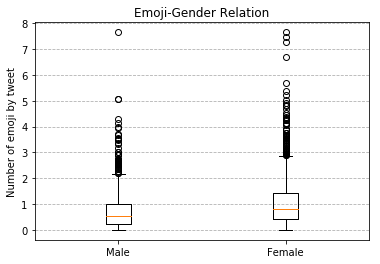

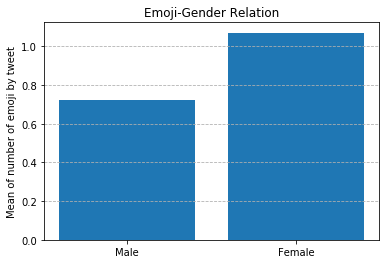

In [0]:
#@title Relación entre el número de emojis y el género

#Relación con el género
if 'nEmojiMale' in locals():
  del nEmojiMale
nEmojiMale = [0]
if 'nEmojiFemale' in locals():
  del nEmojiFemale
nEmojiFemale = [0]

j=0
k=0
for i in range(0, (n_author)):
  if (realGender[i] == "Male"):
    if (j > 0):
      nEmojiMale.append(0)
    nEmojiMale[j]=len(emojiText[i])/nTweet[i]
    j=j+1
  else:
    if (k > 0):
      nEmojiFemale.append(0)
    nEmojiFemale[k]=len(emojiText[i])/nTweet[i]
    k=k+1

data = [nEmojiMale,nEmojiFemale] 
fig1, ax1 = plt.subplots()
ax1.set_title('Emoji-Gender Relation')
ax1.set_ylabel('Number of emoji by tweet')
ax1.boxplot(data)
ax1.set_xticklabels(['Male', 'Female'])
ax1.grid(True, linestyle='--', axis='y')
fig1.savefig(path_directory + "/" + 'fig1.png',dpi=300)

fig2, ax2 = plt.subplots()
ax2.set_title('Emoji-Gender Relation')
ax2.set_ylabel('Mean of number of emoji by tweet')
ax2.bar(['Male', 'Female'], [np.mean(nEmojiMale),np.mean(nEmojiFemale)])
ax2.grid(True, linestyle='--', axis='y')
fig2.savefig(path_directory + "/" + 'fig2.png',dpi=300)




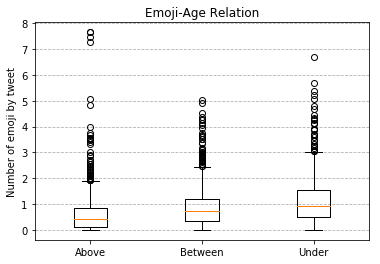

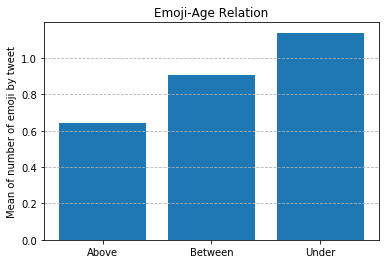

In [0]:
#@title Relación entre el número de emojis y la edad

#Relación con el género
if 'nEmojiAbove' in locals():
  del nEmojiAbove
nEmojiAbove = [0]
if 'nEmojiBetween' in locals():
  del nEmojiBetween
nEmojiBetween = [0]
if 'nEmojiUnder' in locals():
  del nEmojiUnder
nEmojiUnder = [0]

j=0
k=0
l=0
for i in range(0, (n_author)):
  if (realAge[i] == "Above"):
    if (j > 0):
      nEmojiAbove.append(0)
    nEmojiAbove[j]=len(emojiText[i])/nTweet[i]
    j=j+1
  elif (realAge[i] == "Between"):
    if (k > 0):
      nEmojiBetween.append(0)
    nEmojiBetween[k]=len(emojiText[i])/nTweet[i]
    k=k+1
  else:
    if (l > 0):
      nEmojiUnder.append(0)
    nEmojiUnder[l]=len(emojiText[i])/nTweet[i]
    l=l+1

data = [nEmojiAbove,nEmojiBetween,nEmojiUnder] 
fig3, ax3 = plt.subplots()
ax3.set_title('Emoji-Age Relation')
ax3.set_ylabel('Number of emoji by tweet')
ax3.boxplot(data)
ax3.set_xticklabels(['Above', 'Between', 'Under'])
ax3.grid(True, linestyle='--', axis='y')
fig3.savefig(path_directory + "/" + 'fig3.png',dpi=300)

fig4, ax4 = plt.subplots()
ax4.set_title('Emoji-Age Relation')
ax4.set_ylabel('Mean of number of emoji by tweet')
ax4.bar(['Above', 'Between', 'Under'], [np.mean(nEmojiAbove),np.mean(nEmojiBetween),np.mean(nEmojiUnder)])
ax4.grid(True, linestyle='--', axis='y')
fig4.savefig(path_directory + "/" + 'fig4.png',dpi=300)


In [0]:
#@title Generar variable característica del número de emoji por tweet
if 'nEmoji' in locals():
  del nEmoji
nEmoji = [0]

for i in range(0, (n_author)):
  if (i > 0):
    nEmoji.append(0)
  nEmoji[i]=len(emojiText[i])/nTweet[i]
  i=i+1


# 5. Tratar datos para modelar Pt. II (Tokenizar y frecuenciar el texto y los emojis)

In [0]:
#@title Tokenizar los emojis
from nltk.tokenize.casual import TweetTokenizer

if 'emojiTok' in locals():
  del emojiTok
emojiTok = [0]


for i in range(0, (n_author)):
  if (i > 0):
    emojiTok.append(0)

  emojiTok[i] = TweetTokenizer().tokenize(emojiText[i])

In [0]:
#@title Frecuenciar los emojis
from nltk.probability import FreqDist

if 'emojiFrec' in locals():
  del emojiFrec
emojiFrec = [0]

for i in range(0, (n_author)):
  if (i > 0):
    emojiFrec.append(0)
    
  fdist = FreqDist(emojiText[i])
  j=0
  freqWord = [""]
  for word, frequency in fdist.most_common(100):
    if (j == 0):
      freqWord[0]=word
    else:
      freqWord.append(word)
    j=j+1
    
  emojiFrec[i] = freqWord

In [0]:
#@title Tokenizar el texto
if 'textTok' in locals():
  del textTok
textTok = [0]

for i in range(0, (n_author)):
  if (i > 0):
    textTok.append(0)

  textTok[i] = araby.tokenize(dataText[i])

In [0]:
#@title Frecuenciar el texto
from nltk.probability import FreqDist

if 'textFrec' in locals():
  del textFrec
textFrec = [0]

for i in range(0, (n_author)):
  if (i > 0):
    textFrec.append(0)
    
  fdist = FreqDist(textTok[i])
  j=0
  freqWord = [""]
  for word, frequency in fdist.most_common(100):
    if (j == 0):
      freqWord[0]=word
    else:
      freqWord.append(word)
    j=j+1
    
  textFrec[i] = freqWord

# 6. Tratar datos para modelar Pt. III

In [0]:
#@title Eliminar signos de puntuación del texto tokenizado
import re

if 'textTokPunc' in locals():
  del textTokPunc
textTokPunc = [0]

for i in range(0, (n_author)):
  if (i > 0):
    textTokPunc.append(0)
  
  textTokPunc[i] = re.sub(r'[^\w\s]','',dataText[i])
  textTokPunc[i] = araby.tokenize(textTokPunc[i])

In [0]:
#@title Frecuenciar el texto sin signos de puntuación
from nltk.probability import FreqDist

if 'textFrecPunc' in locals():
  del textFrecPunc
textFrecPunc = [0]

for i in range(0, (n_author)):
  if (i > 0):
    textFrecPunc.append(0)
  
  
  fdist = FreqDist(textTokPunc[i])
  j=0
  freqWord = [""]
  for word, frequency in fdist.most_common(100):
    if (j == 0):
      freqWord[0]=word
    else:
      freqWord.append(word)
    j=j+1
    
  textFrecPunc[i] = freqWord
  

In [0]:
#@title Descargar y Cargar StopWordsLittle
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_arabic=set(stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#@title Descargar y Cargar StopWordsFull
file = open(path_directory + "/" + "stopwordslist.txt","r")
stopwordsfull_arabic = stopwords_arabic.copy()
for line in file:
  stopwordsfull_arabic.add(line.strip('\n'))
file.close()

In [0]:
#@title Eliminar StopWordsLittle
if 'textTokSTL' in locals():
  del textTokSTL
textTokSTL = [0]

for i in range(0, (n_author)):
  if (i > 0):
    textTokSTL.append(0)
  
  j = 0
  filtered_sent = [""]
  for w in textTokPunc[i]:
    if w not in stopwords_arabic:
      if (j == 0):
        filtered_sent[0] = w
      else:
        filtered_sent.append(w)
      j = j + 1
        
  textTokSTL[i] = filtered_sent


In [0]:
#@title Eliminar StopWordsFull
if 'textTokSTF' in locals():
  del textTokSTF
textTokSTF = [0]

for i in range(0, (n_author)):
  if (i > 0):
    textTokSTF.append(0)
    
  j = 0
  filtered_sent = [""]
  for w in textTokPunc[i]:
    if w not in stopwordsfull_arabic:
      if (j == 0):
        filtered_sent[0] = w
      else:
        filtered_sent.append(w)
      j = j + 1
        
  textTokSTF[i] = filtered_sent


In [0]:
#@title Frecuenciar el texto sin StopWordsLittle
from nltk.probability import FreqDist

if 'textFrecSTL' in locals():
  del textFrecSTL
textFrecSTL = [0]

for i in range(0, (n_author)):
  if (i > 0):
    textFrecSTL.append(0)
    
  fdist = FreqDist(textTokSTL[i])
  j=0
  freqWord = [""]
  for word, frequency in fdist.most_common(100):
    if (j == 0):
      freqWord[0]=word
    else:
      freqWord.append(word)
    j=j+1
    
  textFrecSTL[i] = freqWord

In [0]:
#@title Frecuenciar el texto sin StopWordsFull
from nltk.probability import FreqDist

if 'textFrecSTF' in locals():
  del textFrecSTF
textFrecSTF = [0]

for i in range(0, (n_author)):
  if (i > 0):
    textFrecSTF.append(0)
    
  fdist = FreqDist(textTokSTF[i])
  j=0
  freqWord = [""]
  for word, frequency in fdist.most_common(100):
    if (j == 0):
      freqWord[0]=word
    else:
      freqWord.append(word)
    j=j+1
    
  textFrecSTF[i] = freqWord
  


# 7. Tratar datos para modelar Pt. IV (Variables agregadas)

In [0]:
#@title Generar tokenización de texto completo y frecuenciar a partir de STF
from nltk.probability import FreqDist

if 'fullTextTokSTF' in locals():
  del fullTextTokSTF
fullTextTokSTF = [""]

if 'fullTextFrecSTF' in locals():
  del fullTextFrecSTF
fullTextFrecSTF = ""


for i in range(0, (n_author)):
  fullTextTokSTF = fullTextTokSTF + textTokSTF[i]
  #print(str(i+1) + " de " + str(n_author))
  
fullTextTokSTF.remove('')

fdist = FreqDist(fullTextTokSTF)
j=0
freqWord = [""]
for word, frequency in fdist.most_common(1000):
  if (j == 0):
    freqWord[0]=word
  else:
    freqWord.append(word)
  j=j+1

fullTextFrecSTF = freqWord

In [0]:
#@title Generar tokenización de texto completo y frecuenciar a partir de STF
from nltk.probability import FreqDist

if 'fullTextTok' in locals():
  del fullTextTok
fullTextTok = [""]

if 'fullTextFrec' in locals():
  del fullTextFrec
fullTextFrec = ""


for i in range(0, (n_author)):
  fullTextTok = fullTextTok + textTok[i]
  #print(str(i+1) + " de " + str(n_author))
  
fullTextTok.remove('')

fdist = FreqDist(fullTextTok)
j=0
freqWord = [""]
for word, frequency in fdist.most_common(1000):
  if (j == 0):
    freqWord[0]=word
  else:
    freqWord.append(word)
  j=j+1

fullTextFrec = freqWord

In [0]:
#@title Generar tokenización de todos los emojis y frecuenciar
from nltk.probability import FreqDist

if 'fullEmojiTok' in locals():
  del fullEmojiTok
fullEmojiTok = [""]


if 'fullEmojiFrec' in locals():
  del fullEmojiFrec
fullEmojiFrec = ""


for i in range(0, (n_author)):
  fullEmojiTok = fullEmojiTok + emojiTok[i]
    
fullEmojiTok.remove('')
    
fdist = FreqDist(fullEmojiTok)
j=0
freqWord = [""]
for word, frequency in fdist.most_common(100):
  if (j == 0):
    freqWord[0]=word
  else:
    freqWord.append(word)
  j=j+1

fullEmojiFrec = freqWord

# 8. Tratar datos para modelar Pt. V (BoW y TF-IDF)

In [0]:
#@title Generar BoW para fullTexFrecSTF
def Bow(allsentences,vocab):
  bag_vector = np.zeros((len(allsentences), len(vocab)))
  # For each sentence
  for j in range(len(allsentences)):
      # For each word within the sentence
      for w in allsentences[j]:
          # For each word within the vocabulary
          for i,word in enumerate(vocab):
              # If the word is in vocabulary, add 1 in position
              if word == w: 
                  bag_vector[j,i] += 1
  return bag_vector

BoWText = Bow(textTokSTF,fullTextFrecSTF)

In [0]:
#@title Generar BoW para fullTexFrec sin StopWords
BoWTextNOST = Bow(textTok,fullTextFrec)

In [0]:
#@title Generar TextTFIDF para BoWText

#La deficinión de TF-IDF es la siguiente:
#  TF-IDF(term) = TF(term in a document) * IDF(term)
#  TF(term) = # of times the term appears in document / total # of terms in document
#  IDF(term) = log(total # of documents / # of documents with term in it)

#Preallocate
def TFIDF(BoW):
  TF = np.zeros((len(BoW), len(BoW[0])))
  IDF = np.zeros((len(BoW), len(BoW[0])))
  TFIDF = np.zeros((len(BoW), len(BoW[0])))
  df = np.zeros(len(BoW[0]))
  

  for i in range(len(BoW)):
    for j in range(len(BoW[i])):
      df[j] = 0
      if (BoW[i][j] != 0):
        df[j] = df[j] + 1
  
  for i in range(len(BoW)):
    for j in range(len(BoW[i])):
      
      if (sum(BoW[i]) == 0):
        TF[i,j] = 0
      else:
        TF[i,j]=BoW[i,j]/sum(BoW[i])
      
      if (df[j] == 0):
        IDF[i,j] = 0
      else:
        IDF[i,j]=np.log(len(BoW)/df[j])

      TFIDF[i,j] = TF[i,j]*IDF[i,j]
  return TFIDF

TextTFIDF = TFIDF(BoWText)

In [0]:
#@title Generar BoW para fullEmojiTok
BoWEmoji = Bow(emojiTok,fullEmojiFrec)

In [0]:
#@title Generar EmojiTFIDF para BoWEmoji
EmojiTFIDF = TFIDF(BoWEmoji)

# 11. Tratar datos para modelar Pt. VI (BiGramas y TriGramas)

In [0]:
#@title Generar tokenización de texto completo y frecuenciar a partir de STF con bigramas y trigramas
from nltk.probability import FreqDist

biwordFull = [b for b in nltk.bigrams(fullTextTokSTF)]
triwordFull = [t for t in nltk.trigrams(fullTextTokSTF)]


fdist = FreqDist(biwordFull)
j=0
freqWord = [""]
for word, frequency in fdist.most_common(1000):
  if (j == 0):
    freqWord[0]=word
  else:
    freqWord.append(word)
  j=j+1

biwordFrecFull = freqWord


fdist = FreqDist(triwordFull)
j=0
freqWord = [""]
for word, frequency in fdist.most_common(1000):
  if (j == 0):
    freqWord[0]=word
  else:
    freqWord.append(word)
  j=j+1

triwordFrecFull = freqWord


In [0]:
#@title Generar tokenización de emoji completo y frecuenciar a partir de STF con bigramas y trigramas
from nltk.probability import FreqDist

biemojiFull = [b for b in nltk.bigrams(fullEmojiTok)]
triemojiFull = [t for t in nltk.trigrams(fullEmojiTok)]


fdist = FreqDist(biemojiFull)
j=0
freqWord = [""]
for word, frequency in fdist.most_common(1000):
  if (j == 0):
    freqWord[0]=word
  else:
    freqWord.append(word)
  j=j+1

biemojiFrecFull = freqWord


fdist = FreqDist(triemojiFull)
j=0
freqWord = [""]
for word, frequency in fdist.most_common(1000):
  if (j == 0):
    freqWord[0]=word
  else:
    freqWord.append(word)
  j=j+1

triemojiFrecFull = freqWord



In [0]:
#@title Generar BoW para biwordFrecFull
if 'biword' in locals():
  del biword
biword = [0]

for i in range(0, (n_author)):
  if (i > 0):
    biword.append(0)
    
  biword[i] = [b for b in nltk.bigrams(textTokSTF[i])]

BoWTextBi = Bow(biword,biwordFrecFull)

In [0]:
#@title Generar BoW para triwordFrecFull
if 'triword' in locals():
  del triword
triword = [0]

for i in range(0, (n_author)):
  if (i > 0):
    triword.append(0)
    
  triword[i] = [b for b in nltk.trigrams(textTokSTF[i])]

BoWTextTri = Bow(triword,triwordFrecFull)

In [0]:
#@title Generar TextBiTFIDF para BoWTextBi
TextBiTFIDF = TFIDF(BoWTextBi)

In [0]:
#@title Generar TextTriTFIDF para BoWTextTri
TextTriTFIDF = TFIDF(BoWTextTri)

In [0]:
#@title Generar BoW para biemojiFrecFull
if 'biemoji' in locals():
  del biemoji
biemoji = [0]

for i in range(0, (n_author)):
  if (i > 0):
    biemoji.append(0)
    
  biemoji[i] = [b for b in nltk.bigrams(emojiTok[i])]

BoWEmojiBi = Bow(biemoji,biemojiFrecFull)

In [0]:
#@title Generar BoW para triemojiFrecFull
if 'triemoji' in locals():
  del triemoji
triemoji = [0]

for i in range(0, (n_author)):
  if (i > 0):
    triemoji.append(0)
    
  triemoji[i] = [b for b in nltk.trigrams(emojiTok[i])]

BoWEmojiTri = Bow(triemoji,triemojiFrecFull)

In [0]:
#@title Generar EmojiBiTFIDF para BoWEmojiBi
EmojiBiTFIDF = TFIDF(BoWEmojiBi)

In [0]:
#@title Generar EmojiTriTFIDF para BoWEmojiTri
EmojiTriTFIDF = TFIDF(BoWEmojiTri)

In [0]:
#@title Ejemplo de variables hasta ahora
i=12

print("Input Train")
print("author[i]: ", author[i])
print("dataText[i]: ", dataText[i])
print("emojiText[i]: ", emojiText[i])
print("nTweet[i]: ", nTweet[i])
print("realGender[i]: ", realGender[i])
print("realAge[i]: ", realAge[i])
print("realVariety[i]: ", realVariety[i])


print("")
print("Numéricas")
print("nEmoji[i]: ", nEmoji[i])

print("")
print("Tokenized")
print("emojiTok[i]: ", emojiTok[i])
print("textTok[i]: ", textTok[i])
print("textTokPunc[i]: ", textTokPunc[i])
print("textTokSTL[i]: ", textTokSTL[i])
print("textTokSTF[i]: ", textTokSTF[i])

print("")
print("Frequency")
print("emojiFrec[i]: ", emojiFrec[i])
print("textFrec[i]: ", textFrec[i])
print("textFrecPunc[i]: ", textFrecPunc[i])
print("textFrecSTL[i]: ", textFrecSTL[i])
print("textFrecSTF[i]: ", textFrecSTF[i])


print("")
print("Agregadas")
print("fullEmojiFrec: ", fullEmojiFrec)
print("fullTextFrec: ", fullTextFrec)
print("fullTextFrecSTF: ", fullTextFrecSTF)
print("fullEmojiTok: ", fullEmojiTok[:100])
print("fullTextTok: ", fullTextTok[:100])
print("fullTextTokSTF: ", fullTextTokSTF[:100])
print("biemojiFrecFull: ", biemojiFrecFull)
print("triemojiFrecFull: ", triemojiFrecFull)
print("biwordFrecFull: ", biwordFrecFull)
print("triwordFrecFull: ", triwordFrecFull)
print("biemojiFull: ", biemojiFull[:10])
print("triemojiFull: ", triemojiFull[:10])
print("biwordFull: ", biwordFull[:10])
print("triwordFull: ", triwordFull[:10])

print("")
print("BoW")
print("BoWEmoji: ", BoWEmoji)
print("BoWEmojiBi: ", BoWEmojiBi)
print("BoWEmojiTri: ", BoWEmojiTri)
print("BoWText: ", BoWText)
print("BoWTextNOST: ", BoWTextNOST)
print("BoWTextBi: ", BoWTextBi)
print("BoWTextTri: ", BoWTextTri)


print("")
print("TFIDF")
print("EmojiTFIDF: ",EmojiTFIDF)
print("EmojiBiTFIDF: ",EmojiBiTFIDF)
print("EmojiTriTFIDF: ",EmojiTriTFIDF)
print("TextTFIDF: ",TextTFIDF)
print("TextBiTFIDF: ",TextBiTFIDF)
print("TextTriTFIDF: ",TextTriTFIDF)

Input Train
author[i]:  012a4a2abfaebc0a411d65a0e72fc9fc
dataText[i]:  مبرووووووووك ما جاكي يتربي في عزك منور امين فديت قلبك منووور ياعمار احلا منووور عمارنا الله يسعدككل عام وانت الاجمل وكل عام وانت الافضل وكل سنه وانت اجمل ما حصل في في الفن اليمني كل سنه وانت نجم عالي في سماء الفن العالمي ... كل عام وانت بالف خير يا سفير اليمن يارب سنه سعيده عليك تتحقق كل احلامك يارب ❤ اذا ترجع هذي الاغنيه عشق لا ينتهي . وكمان دلوع اكثر غنيتين معلقين معي وبشكل عام الالبوم فووووق الوصف الله يسعدك يا ابن اليمن غالي شرفت اليمن والفن اليمني . #كلام_ابيض ابدع يا وائل موفق يارب من نجاح الى نجاح اخي تسلم الايادي الغنى المُطلق أن تعيش الحياة على منهج ، أنا جنتي في صدري ، فترى في نفسك الواسعة مُبتدأ السرور ومنتهاه لا تؤمن بالانتقام ولا رد الوجع بالوجع ثق بان هذه الدنيا صغيره وسريع دورانها. يب يب خهههههههه مي هاتوهم نعمل جروب بدل الضبح تدوم والله مدري عاشق انا الذي اعرفو الحمد الله هلا فيك كيفك اها سلم على العريس هههههههه اتوسطلك وباقي عصابه ال الشلح فينهم ويسعدك ياااارب خيو فين الباقي نعمل جروب هنا كمان ايوه 

In [0]:
#@title Guardar en Pickle las variables complestas, incluido procesado
with open(path_directory + "/" + 'trainVariablesCompleteIncProc.pickle', 'wb') as f:
  pickle.dump([n_author,
              author, 
              dataText, 
              emojiText, 
              nTweet, 
              realGender, 
              realAge, 
              realVariety, 
              nEmoji, 
              emojiTok, 
              textTok, 
              textTokPunc, 
              textTokSTL, 
              textTokSTF, 
              emojiFrec, 
              textFrec, 
              textFrecPunc, 
              textFrecSTL, 
              textFrecSTF, 
              fullEmojiFrec,
              fullTextFrec, 
              fullTextFrecSTF, 
              fullEmojiTok, 
              fullTextTok,
              fullTextTokSTF, 
              biemojiFrecFull, 
              triemojiFrecFull, 
              biwordFrecFull, 
              triwordFrecFull, 
              biemojiFull, 
              triemojiFull, 
              biwordFull, 
              triwordFull, 
              BoWEmoji, 
              BoWEmojiBi, 
              BoWEmojiTri, 
              BoWText,
              BoWTextNOST,
              BoWTextBi, 
              BoWTextTri, 
              EmojiTFIDF, 
              EmojiBiTFIDF, 
              EmojiTriTFIDF, 
              TextTFIDF, 
              TextBiTFIDF, 
              TextTriTFIDF] , f)

In [0]:
#@title Cargar en Pickle las variables completas, incluido procesado (si es necesario)
with open(path_directory + "/" + 'trainVariablesCompleteIncProc.pickle', 'rb') as f:
    n_author,
    author, 
    dataText, 
    emojiText, 
    nTweet, 
    realGender, 
    realAge, 
    realVariety, 
    nEmoji, 
    emojiTok, 
    textTok, 
    textTokPunc, 
    textTokSTL, 
    textTokSTF, 
    emojiFrec, 
    textFrec, 
    textFrecPunc, 
    textFrecSTL, 
    textFrecSTF, 
    fullEmojiFrec,
    fullTextFrec, 
    fullTextFrecSTF, 
    fullEmojiTok, 
    fullTextTok,
    fullTextTokSTF, 
    biemojiFrecFull, 
    triemojiFrecFull, 
    biwordFrecFull, 
    triwordFrecFull, 
    biemojiFull, 
    triemojiFull, 
    biwordFull, 
    triwordFull, 
    BoWEmoji, 
    BoWEmojiBi, 
    BoWEmojiTri, 
    BoWText,
    BoWTextNOST,
    BoWTextBi, 
    BoWTextTri, 
    EmojiTFIDF, 
    EmojiBiTFIDF, 
    EmojiTriTFIDF, 
    TextTFIDF, 
    TextBiTFIDF, 
    TextTriTFIDF = pickle.load(f)

# 10. Modelizar Age - Pt. I

In [0]:
#@title Modelo 1_AGE: BoWText-(RandomForest)
x = BoWText
y = realAge

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[173  40  21]
 [ 87  59  86]
 [ 32  29 148]]
              precision    recall  f1-score   support

       Above       0.59      0.74      0.66       234
     Between       0.46      0.25      0.33       232
       Under       0.58      0.71      0.64       209

    accuracy                           0.56       675
   macro avg       0.54      0.57      0.54       675
weighted avg       0.54      0.56      0.54       675

0.562962962962963


In [0]:
#@title Modelo 2_AGE: TextTFIDF-(RandomForest)
x = TextTFIDF
y = realAge

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[164  35  35]
 [ 90  45  97]
 [ 39  26 144]]
              precision    recall  f1-score   support

       Above       0.56      0.70      0.62       234
     Between       0.42      0.19      0.27       232
       Under       0.52      0.69      0.59       209

    accuracy                           0.52       675
   macro avg       0.50      0.53      0.49       675
weighted avg       0.50      0.52      0.49       675

0.522962962962963


In [0]:
#@title Modelo 3_AGE: BoWText + BoWEmoji - (RandomForest)
x = np.zeros((len(BoWText), len(BoWText[0])+len(BoWEmoji[0])))
for i in range(len(BoWText)):
  x[i] = np.append(BoWText[i],BoWEmoji[i])

y = realAge

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[174  43  17]
 [ 80  62  90]
 [ 31  29 149]]
              precision    recall  f1-score   support

       Above       0.61      0.74      0.67       234
     Between       0.46      0.27      0.34       232
       Under       0.58      0.71      0.64       209

    accuracy                           0.57       675
   macro avg       0.55      0.57      0.55       675
weighted avg       0.55      0.57      0.55       675

0.5703703703703704


In [0]:
#@title (MEJOR)Modelo 3(mod)_AGE: BoWTextNOST + BoWEmoji - (RandomForest)
x = np.zeros((len(BoWTextNOST), len(BoWTextNOST[0])+len(BoWEmoji[0])))
for i in range(len(BoWTextNOST)):
  x[i] = np.append(BoWTextNOST[i],BoWEmoji[i])

y = realAge

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[181  28  25]
 [ 87  60  85]
 [ 31  30 148]]
              precision    recall  f1-score   support

       Above       0.61      0.77      0.68       234
     Between       0.51      0.26      0.34       232
       Under       0.57      0.71      0.63       209

    accuracy                           0.58       675
   macro avg       0.56      0.58      0.55       675
weighted avg       0.56      0.58      0.55       675

0.5762962962962963


# 11. Modelizar Age - Pt. II

In [0]:
#@title Modelo 4_AGE: BoWText(PCA(100)) + BoWEmoji(PCA(50)) - (RandomForest)
from sklearn.decomposition import PCA
PCABoWText = PCA(n_components=100).fit_transform(BoWText)
PCABoWEmoji = PCA(n_components=10).fit_transform(BoWEmoji)

x = np.zeros((len(PCABoWText), len(PCABoWText[0])+len(PCABoWEmoji[0])))
for i in range(len(PCABoWText)):
  x[i] = np.append(PCABoWText[i],PCABoWEmoji[i])

y = realAge

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

In [0]:
#@title Modelo 5_AGE: BoWTextBi-(RandomForest)
from sklearn.decomposition import PCA
PCABoWTextBi = PCA(n_components=100).fit_transform(BoWTextBi)
x = PCABoWTextBi
y = realAge

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[128  61  45]
 [ 87  61  84]
 [ 49  53 107]]
              precision    recall  f1-score   support

       Above       0.48      0.55      0.51       234
     Between       0.35      0.26      0.30       232
       Under       0.45      0.51      0.48       209

    accuracy                           0.44       675
   macro avg       0.43      0.44      0.43       675
weighted avg       0.43      0.44      0.43       675

0.43851851851851853


In [0]:
#@title Modelo 6_AGE: BoWText(PCA_100) + BoWEmojiBi(PCA_10) - (RandomForest)
from sklearn.decomposition import PCA
x1 = PCA(n_components=100).fit_transform(BoWText)
x2 = PCA(n_components=10).fit_transform(BoWEmojiBi)
x = np.zeros((len(x1), len(x1[0])+len(x1[0])))
for i in range(len(x1)):
  x[i] = np.append(x1[i],x1[i])

y = realAge

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[165  46  23]
 [ 96  67  69]
 [ 36  39 134]]
              precision    recall  f1-score   support

       Above       0.56      0.71      0.62       234
     Between       0.44      0.29      0.35       232
       Under       0.59      0.64      0.62       209

    accuracy                           0.54       675
   macro avg       0.53      0.55      0.53       675
weighted avg       0.53      0.54      0.53       675

0.5422222222222223


In [0]:
#@title Modelo 7_AGE: BoWText + BoWEmojiBi - (MultinomialNB)
from sklearn.decomposition import PCA
x1 = BoWText
x2 = BoWEmojiBi
x = np.zeros((len(x1), len(x1[0])+len(x1[0])))
for i in range(len(x1)):
  x[i] = np.append(x1[i],x1[i])

y = realAge

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))


[[139  53  42]
 [ 71  54 107]
 [ 25  23 161]]
              precision    recall  f1-score   support

       Above       0.59      0.59      0.59       234
     Between       0.42      0.23      0.30       232
       Under       0.52      0.77      0.62       209

    accuracy                           0.52       675
   macro avg       0.51      0.53      0.50       675
weighted avg       0.51      0.52      0.50       675

0.5244444444444445


In [0]:
#@title Modelo 8_AGE: TextTFIDF(PCA_200) + EmojiBiTFIDF(PCA_100) - (RandomForestClassifier)
from sklearn.decomposition import PCA
x1 = PCA(n_components=200).fit_transform(TextTFIDF)
x2 = PCA(n_components=100).fit_transform(EmojiBiTFIDF)
x = np.zeros((len(x1), len(x1[0])+len(x1[0])))
for i in range(len(x1)):
  x[i] = np.append(x1[i],x1[i])

y = realAge

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0) 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))


[[161  33  40]
 [ 90  53  89]
 [ 38  42 129]]
              precision    recall  f1-score   support

       Above       0.56      0.69      0.62       234
     Between       0.41      0.23      0.29       232
       Under       0.50      0.62      0.55       209

    accuracy                           0.51       675
   macro avg       0.49      0.51      0.49       675
weighted avg       0.49      0.51      0.49       675

0.5081481481481481


# 12. Modelizar Gender - Pt. I

In [0]:
#@title Modelo 1_GENDER: BoWText-(RandomForest)
x = BoWText
y = realGender

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[259  72]
 [ 78 266]]
              precision    recall  f1-score   support

      Female       0.77      0.78      0.78       331
        Male       0.79      0.77      0.78       344

    accuracy                           0.78       675
   macro avg       0.78      0.78      0.78       675
weighted avg       0.78      0.78      0.78       675

0.7777777777777778


In [0]:
#@title Modelo 2_GENDER: TextTFIDF-(RandomForest)
x = TextTFIDF
y = realGender

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[241  90]
 [121 223]]
              precision    recall  f1-score   support

      Female       0.67      0.73      0.70       331
        Male       0.71      0.65      0.68       344

    accuracy                           0.69       675
   macro avg       0.69      0.69      0.69       675
weighted avg       0.69      0.69      0.69       675

0.6874074074074074


In [0]:
#@title Modelo 3_GENDER: BoWText + BoWEmoji - (RandomForest)
x = np.zeros((len(BoWText), len(BoWText[0])+len(BoWEmoji[0])))
for i in range(len(BoWText)):
  x[i] = np.append(BoWText[i],BoWEmoji[i])

y = realGender

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[261  70]
 [ 53 291]]
              precision    recall  f1-score   support

      Female       0.83      0.79      0.81       331
        Male       0.81      0.85      0.83       344

    accuracy                           0.82       675
   macro avg       0.82      0.82      0.82       675
weighted avg       0.82      0.82      0.82       675

0.8177777777777778


In [0]:
#@title (MEJOR)Modelo 3(mod)_GENDER: BoWTextNOST + BoWEmoji - (RandomForest)
x = np.zeros((len(BoWTextNOST), len(BoWTextNOST[0])+len(BoWEmoji[0])))
for i in range(len(BoWTextNOST)):
  x[i] = np.append(BoWTextNOST[i],BoWEmoji[i])

y = realGender

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[258  73]
 [ 41 303]]
              precision    recall  f1-score   support

      Female       0.86      0.78      0.82       331
        Male       0.81      0.88      0.84       344

    accuracy                           0.83       675
   macro avg       0.83      0.83      0.83       675
weighted avg       0.83      0.83      0.83       675

0.8311111111111111


# 13. Modelizar Gender - Pt. II

In [0]:
#@title Modelo 4_GENDER: BoWText(PCA(100)) + BoWEmoji(PCA(50)) - (RandomForest)
from sklearn.decomposition import PCA
PCABoWText = PCA(n_components=100).fit_transform(BoWText)
PCABoWEmoji = PCA(n_components=10).fit_transform(BoWEmoji)

x = np.zeros((len(PCABoWText), len(PCABoWText[0])+len(PCABoWEmoji[0])))
for i in range(len(PCABoWText)):
  x[i] = np.append(PCABoWText[i],PCABoWEmoji[i])

y = realGender

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[246  85]
 [101 243]]
              precision    recall  f1-score   support

      Female       0.71      0.74      0.73       331
        Male       0.74      0.71      0.72       344

    accuracy                           0.72       675
   macro avg       0.72      0.72      0.72       675
weighted avg       0.73      0.72      0.72       675

0.7244444444444444


In [0]:
#@title Modelo 5_GENDER: BoWText(PCA_100) + BoWEmojiBi(PCA_10) - (RandomForest)
from sklearn.decomposition import PCA
x1 = PCA(n_components=100).fit_transform(BoWText)
x2 = PCA(n_components=10).fit_transform(BoWEmojiBi)
x = np.zeros((len(x1), len(x1[0])+len(x1[0])))
for i in range(len(x1)):
  x[i] = np.append(x1[i],x1[i])

y = realGender

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[249  82]
 [125 219]]
              precision    recall  f1-score   support

      Female       0.67      0.75      0.71       331
        Male       0.73      0.64      0.68       344

    accuracy                           0.69       675
   macro avg       0.70      0.69      0.69       675
weighted avg       0.70      0.69      0.69       675

0.6933333333333334


In [0]:
#@title Modelo 6_GENDER: BoWTextBi-(RandomForest)
x = BoWTextBi
y = realGender

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[235  96]
 [109 235]]
              precision    recall  f1-score   support

      Female       0.68      0.71      0.70       331
        Male       0.71      0.68      0.70       344

    accuracy                           0.70       675
   macro avg       0.70      0.70      0.70       675
weighted avg       0.70      0.70      0.70       675

0.6962962962962963


In [0]:
#@title Modelo 7_GENDER: BoWTextTri-(RandomForest)
x = BoWTextTri
y = realGender

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[122 209]
 [105 239]]
              precision    recall  f1-score   support

      Female       0.54      0.37      0.44       331
        Male       0.53      0.69      0.60       344

    accuracy                           0.53       675
   macro avg       0.54      0.53      0.52       675
weighted avg       0.54      0.53      0.52       675

0.5348148148148149


In [0]:
#@title Modelo 8_GENDER: BoWEmoji-(RandomForest)
x = BoWEmoji
y = realGender

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[240  91]
 [ 84 260]]
              precision    recall  f1-score   support

      Female       0.74      0.73      0.73       331
        Male       0.74      0.76      0.75       344

    accuracy                           0.74       675
   macro avg       0.74      0.74      0.74       675
weighted avg       0.74      0.74      0.74       675

0.7407407407407407


In [0]:
#@title Modelo 9_GENDER: BoWEmojiBi-(RandomForest)
x = BoWEmojiBi
y = realGender

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[233  98]
 [ 77 267]]
              precision    recall  f1-score   support

      Female       0.75      0.70      0.73       331
        Male       0.73      0.78      0.75       344

    accuracy                           0.74       675
   macro avg       0.74      0.74      0.74       675
weighted avg       0.74      0.74      0.74       675

0.7407407407407407


In [0]:
#@title Modelo 10_GENDER: BoWEmojiTri-(RandomForest)
x = BoWEmojiTri
y = realGender

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[202 129]
 [ 80 264]]
              precision    recall  f1-score   support

      Female       0.72      0.61      0.66       331
        Male       0.67      0.77      0.72       344

    accuracy                           0.69       675
   macro avg       0.69      0.69      0.69       675
weighted avg       0.69      0.69      0.69       675

0.6903703703703704


# 14. Modelizar Variety - Pt. I

In [0]:
#@title Modelo 1_VARIETY: BoWText-(RandomForest)
x = BoWText
y = realVariety

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[34  0  1  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  0  2 49  0  0  0  2  0  0  1  0  0  2  1]
 [ 0  0  0  0 42  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0 50  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 48  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  2  0  0  0  2  1]
 [ 2  0  1  0  1  0  0  2 42  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  2  0 41  1  0  0  2  1]
 [ 0  0  1  1  0  0  0  6  1  0 32  0  0  1  1]
 [ 0  1  0  0  0  0  0  0  0  0  0 49  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  2  0  0  0  3  1  3  0  0  0 41  2]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  2 38]]
                  precision    recall  f1-score   support

        Algeria
       0.92      0.92      0.92        37
          Egypt
       0.95      1.00      0.98        41
           Iraq
       0.88      0.95      0.92        40
         Kuwait
       0.92      0.86      0.8

In [0]:
#@title Modelo 2_VARIETY: TextTFIDF-(RandomForest)
x = TextTFIDF
y = realVariety

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[17  2  0  0  1  0  3  2  0  0  0  3  7  0  2]
 [ 0 37  0  0  0  0  0  0  1  0  0  2  1  0  0]
 [ 5  0 24  0  1  1  1  2  0  0  0  1  3  1  1]
 [ 7  0  3 13  0  1  1  5  1 13  7  1  2  2  1]
 [ 1  0  0  0 38  0  0  0  0  0  0  0  3  0  0]
 [ 8  7  5  0  0 21  2  0  0  0  2  2  4  0  1]
 [ 2  1  0  0  1  0 42  0  0  0  1  1  0  0  1]
 [ 2  3  3  0  1  0  0 16  1  2  3  0  2  0  1]
 [ 3  1  0  0  9  0  0  1 30  0  0  2  3  0  0]
 [ 3  3  0  6  1  1  1  3  0 18  3  1  1  4  3]
 [ 7  4  1  1  1  0  3  5  0  1 13  2  0  4  1]
 [ 3  5  0  0  0  0  0  0  1  0  0 35  4  0  3]
 [ 6  0  1  0  1  0  0  0  2  0  0  1 26  1  1]
 [ 0  1  0  1  2  0  0  1  3  9  0  0  0 34  1]
 [ 0  0  0  0  0  0  0  3  0  1  0  1  1  0 35]]
                  precision    recall  f1-score   support

        Algeria
       0.27      0.46      0.34        37
          Egypt
       0.58      0.90      0.70        41
           Iraq
       0.65      0.60      0.62        40
         Kuwait
       0.62      0.23      0.3

In [0]:
#@title (MEJOR)Modelo 3_VARIETY: BoWText + BoWEmoji - (RandomForest)
x = np.zeros((len(BoWText), len(BoWText[0])+len(BoWEmoji[0])))
for i in range(len(BoWText)):
  x[i] = np.append(BoWText[i],BoWEmoji[i])

y = realVariety

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[33  0  1  0  0  0  1  2  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  1  0  0  1  0  0  0  0]
 [ 0  0  1 50  0  0  0  2  0  0  1  0  0  2  1]
 [ 0  0  0  0 42  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0 50  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 48  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  1  0  0  0  2  1]
 [ 2  0  1  0  1  0  0  2 42  0  1  0  0  0  0]
 [ 0  0  1  1  0  0  0  1  0 41  1  0  0  2  1]
 [ 0  0  1  1  0  0  0  6  1  0 32  0  0  1  1]
 [ 0  1  0  0  0  0  0  0  0  0  0 49  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  2  0  0  0  1  1  4  0  0  0 42  2]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  2 38]]
                  precision    recall  f1-score   support

        Algeria
       0.92      0.89      0.90        37
          Egypt
       0.95      1.00      0.98        41
           Iraq
       0.88      0.95      0.92        40
         Kuwait
       0.93      0.88      0.9

# 15. Modelizar Variety - Pt. II

In [0]:
#@title Modelo 4_VARIETY: BoWText(PCA(100)) + BoWEmoji(PCA(50)) - (RandomForest)
from sklearn.decomposition import PCA
PCABoWText = PCA(n_components=100).fit_transform(BoWText)
PCABoWEmoji = PCA(n_components=10).fit_transform(BoWEmoji)

x = np.zeros((len(PCABoWText), len(PCABoWText[0])+len(PCABoWEmoji[0])))
for i in range(len(PCABoWText)):
  x[i] = np.append(PCABoWText[i],PCABoWEmoji[i])

y = realVariety

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[32  0  1  0  0  1  0  3  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 33  0  0  0  0  3  0  0  1  0  0  1  0]
 [ 1  0  6 37  0  0  0  7  0  0  4  0  0  2  0]
 [ 0  0  1  0 41  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 48  0  3  0  0  0  0  1  0  0]
 [ 4  0  1  0  0  0 44  0  0  0  0  0  0  0  0]
 [ 1  0  0  2  0  2  0 24  1  2  1  0  0  1  0]
 [ 1  0  0  0  1  0  0  1 43  0  3  0  0  0  0]
 [ 0  1  1  1  0  1  0  2  0 37  1  0  0  4  0]
 [ 1  0  0  1  0  0  0  8  1  0 28  0  0  4  0]
 [ 0  0  0  0  0  0  0  1  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  2  0  1  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  1  0  5  0  9  9  0  0 28  0]
 [ 0  0  0  0  0  1  0  4  0  0  3  0  0  1 32]]
                  precision    recall  f1-score   support

        Algeria
       0.76      0.86      0.81        37
          Egypt
       0.98      1.00      0.99        41
           Iraq
       0.77      0.82      0.80        40
         Kuwait
       0.90      0.65      0.7

In [0]:
#@title Modelo 5_VARIETY: BoWText(PCA_100) + BoWEmojiBi(PCA_10) - (RandomForest)
from sklearn.decomposition import PCA
x1 = PCA(n_components=100).fit_transform(BoWText)
x2 = PCA(n_components=10).fit_transform(BoWEmojiBi)
x = np.zeros((len(x1), len(x1[0])+len(x1[0])))
for i in range(len(x1)):
  x[i] = np.append(x1[i],x1[i])

y = realVariety

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[30  0  1  0  0  1  0  4  0  0  1  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 32  1  0  0  0  2  0  0  2  0  0  1  0]
 [ 0  0  5 39  0  0  0  7  0  0  4  0  0  2  0]
 [ 0  0  1  0 41  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0 46  0  2  0  0  0  0  1  0  0]
 [ 4  0  0  0  0  0 44  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  1  1 26  1  2  2  0  0  0  0]
 [ 2  0  0  0  1  0  0  1 43  0  2  0  0  0  0]
 [ 0  1  0  2  0  1  0  3  0 36  1  0  0  4  0]
 [ 1  0  0  1  0  0  0  8  1  0 27  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 51  0  0  0]
 [ 1  0  0  0  0  2  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  5  0  9  6  0  0 32  0]
 [ 0  0  0  1  0  1  0  4  0  0  2  0  0  1 32]]
                  precision    recall  f1-score   support

        Algeria
       0.70      0.81      0.75        37
          Egypt
       0.95      1.00      0.98        41
           Iraq
       0.82      0.80      0.81        40
         Kuwait
       0.89      0.68      0.7

In [0]:
#@title Modelo 6_VARIETY: BoWTextBi-(RandomForest)
x = BoWTextBi
y = realVariety

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[ 8  0  6  0  0  5  4  5  2  0  1  2  2  0  2]
 [ 0 34  1  0  0  0  0  0  3  0  1  1  0  1  0]
 [ 2  0 18  2  2  1  2  3  1  2  3  0  1  1  2]
 [ 0  0 12  8  1  2  2  9  3  4  4  2  2  8  0]
 [ 1  0  2  0 33  1  0  0  5  0  0  0  0  0  0]
 [ 6  6  5  4  1 13  6  2  4  1  0  2  1  1  0]
 [ 3  0  2  0  0  1 39  0  0  0  0  2  2  0  0]
 [ 1  0  9  1  1  0  2 14  0  4  0  1  0  0  1]
 [ 2  2  8  1  4  1  0  1 24  1  2  0  1  1  1]
 [ 0  0  8  1  0  3  1  3  0 23  1  4  0  3  1]
 [ 0  0  5  4  0  3  0  9  1  4 14  0  1  1  1]
 [ 2  2  4  0  0  2  0  5  0  0  1 32  2  1  0]
 [ 1  0  3  0  1  2  4  5  1  0  0  0 22  0  0]
 [ 0  0  4  5  0  0  3  5  1  1  6  1  0 24  2]
 [ 0  0  1  5  0  2  0  3  1  2  1  0  1  0 25]]
                  precision    recall  f1-score   support

        Algeria
       0.31      0.22      0.25        37
          Egypt
       0.77      0.83      0.80        41
           Iraq
       0.20      0.45      0.28        40
         Kuwait
       0.26      0.14      0.1

In [0]:
#@title Modelo 7_VARIETY: BoWTextTri-(RandomForest)
x = BoWTextTri
y = realVariety

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[ 3  0  3  0 12  3  2  5  0  2  2  0  1  3  1]
 [ 1 10  0  0 19  0  3  3  2  0  0  2  1  0  0]
 [ 1  0  8  0 21  0  0  0  2  1  2  1  0  0  4]
 [ 0  0  4  6 20  4  1  0  3  2  3  3  3  5  3]
 [ 1  0  3  0 29  0  1  0  2  0  2  1  2  0  1]
 [ 4  1  0  2 22  4  3  2  6  1  1  3  0  0  3]
 [ 0  1  1  0 25  3  4  2  1  2  2  2  1  1  4]
 [ 1  1  1  1 13  1  1  3  0  5  1  2  0  0  4]
 [ 1  1  7  4 23  1  0  0  4  1  2  3  0  0  2]
 [ 0  0  0  2 12  3  0  0  2  9  3  3  1  6  7]
 [ 0  0  2  1 12  3  0  3  5  4 10  2  0  0  1]
 [ 1  4  0  2 23  2  2  3  1  1  2  4  0  2  4]
 [ 1  1  1  0 12  3  3  0  0  2  2  4  8  0  2]
 [ 1  0  2  2  9  1  2  5  0  2  4  2  0 18  4]
 [ 1  0  1  5  4  1  1  1  2  3  3  2  2  1 14]]
                  precision    recall  f1-score   support

        Algeria
       0.19      0.08      0.11        37
          Egypt
       0.53      0.24      0.33        41
           Iraq
       0.24      0.20      0.22        40
         Kuwait
       0.24      0.11      0.1

In [0]:
#@title Modelo 8_VARIETY: BoWEmoji-(RandomForest)
x = BoWEmoji
y = realVariety

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[12  2  1  0  3  2  5  4  0  0  0  0  6  1  1]
 [ 0 18  0  0  1  3  1  1  3  0  1  2  4  4  3]
 [ 4  3  4  0  6  2  0  8  3  1  1  0  0  3  5]
 [ 1  4  0 11  2  0  2  3  1  7  7  3  0 14  2]
 [ 2  9  2  0  9  2  0  1  3  0  1  4  3  3  3]
 [ 5  3  3  2  3  4  5  4  1  0  6  7  3  1  5]
 [ 5  2  2  0  4  4 20  0  0  1  1  3  2  1  4]
 [ 0  1  3  2  1  1  0 12  0  2  1  3  2  3  3]
 [ 0  6  1  1  2  2  2  1 10  1  9  2  2  3  7]
 [ 2  3  0  7  0  5  1  2  1 10  5  0  2  5  5]
 [ 2  2  1  1  3  0  0  4  0  4 12  4  1  6  3]
 [ 1  4  2  0  2  3  4  4  3  2  4 12  6  1  3]
 [ 8  2  1  1  4  2  2  0  2  0  2  1  6  2  6]
 [ 0  2  2  1  1  1  0  5  1  7  3  0  1 19  9]
 [ 5  1  2  0  0  0  2  5  0  2  4  2  2  1 15]]
                  precision    recall  f1-score   support

        Algeria
       0.26      0.32      0.29        37
          Egypt
       0.29      0.44      0.35        41
           Iraq
       0.17      0.10      0.12        40
         Kuwait
       0.42      0.19      0.2

In [0]:
#@title Modelo 9_VARIETY: BoWEmojiBi-(RandomForest)
x = BoWEmojiBi
y = realVariety

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[13  2  1  1  1  2  4  2  1  1  3  0  4  0  2]
 [ 1 17  0  0  2  1  2  1  2  1  0  1  5  4  4]
 [ 2  2  6  1  3  4  0  5  2  2  1  0  2  3  7]
 [ 0  6  5  7  4  0  2  3  0  3 10  2  1 10  4]
 [ 3  6  2  0  9  3  1  0  2  0  1  4  6  1  4]
 [ 3  4  3  0  0  2  8  2  1  1  4 11  4  2  7]
 [ 2  2  1  0  2  3 20  0  1  1  1  4  4  1  7]
 [ 1  2  3  2  4  2  0  9  0  0  0  4  1  3  3]
 [ 1  6  2  0  5  1  3  1  7  0  5  4  3  3  8]
 [ 2  2  0  0  2  5  1  5  1  9  7  1  2  6  5]
 [ 1  2  2  0  2  0  1  5  1  2 12  3  1  6  5]
 [ 2  2  1  1  2  2  6  1  3  0  4 13  4  1  9]
 [ 7  3  4  2  2  3  1  2  0  1  1  1  7  0  5]
 [ 0  1  1  2  1  2  1  5  0  4  6  1  3 13 12]
 [ 2  0  3  0  0  2  2  3  1  4  3  1  1  0 19]]
                  precision    recall  f1-score   support

        Algeria
       0.33      0.35      0.34        37
          Egypt
       0.30      0.41      0.35        41
           Iraq
       0.18      0.15      0.16        40
         Kuwait
       0.44      0.12      0.1

In [0]:
#@title Modelo 10_VARIETY: BoWEmojiTri-(RandomForest)
x = BoWEmojiTri
y = realVariety

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)  
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test) 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[10  2  2  1  1  0  7  4  2  0  1  1  1  0  5]
 [ 3 10  0  2  2  2  1  1  4  1  2  1  4  1  7]
 [ 2  1  2  1  3  2  0  4  1  3  4  1  0  2 14]
 [ 2  2  4  4  4  4  5  6  0  4  6  1  3  6  6]
 [ 3  5  1  0  7  3  1  2  3  0  2  4  5  1  5]
 [ 2  3  5  2  3  6  7  2  1  1  2  7  1  2  8]
 [ 2  2  2  0  2  3 18  0  2  1  2  4  2  1  8]
 [ 4  2  2  2  1  2  0  1  1  3  5  4  1  2  4]
 [ 2  6  2  2  3  3  5  3  5  0  2  2  4  2  8]
 [ 3  2  1  0  8  3  2  1  2  4  5  0  2  6  9]
 [ 3  1  1  3  1  1  1  4  1  0 13  1  2  6  5]
 [ 1  2  4  1  1  4  5  3  1  0  3 11  3  0 12]
 [ 6  2  4  2  1  2  1  1  1  0  2  0  4  1 12]
 [ 2  3  1  2  3  2  1  5  1  2  4  1  1 10 14]
 [ 3  2  2  0  0  1  2  1  1  1  8  0  0  0 20]]
                  precision    recall  f1-score   support

        Algeria
       0.21      0.27      0.24        37
          Egypt
       0.22      0.24      0.23        41
           Iraq
       0.06      0.05      0.05        40
         Kuwait
       0.18      0.07      0.1

# 16. Lectura de ficheros de Test

In [311]:
#@title Leer XML test y guardar en variables
#Se eliminan las variables
if 'authorTest' in locals():
  del authorTest

if 'dataTextTest' in locals():
  del dataTextTest

if 'emojiTextTest' in locals():
  del emojiTextTest
  
if 'nTweetTest' in locals():
  del nTweetTest

authorTest = [None]*1000
dataTextTest = [None]*1000
emojiTextTest = [None]*1000
nTweetTest = [None]*1000

i = 0
for root, dirs, files in os.walk(path_test):
  files.sort()
  for filename in files:
    if (filename.find(".xml") != -1):

      if (i > 100):
        authorTest.append("")
        dataTextTest.append("")
        emojiTextTest.append("")
        nTweetTest.append("")


      authorTest[i] = filename[0:-4]
      print(str(i+1) + ". " + authorTest[i])


      data = ""
      dataTextTest[i] = ""
      emojiTextTest[i] = ""
      nTweetTest[i] = 0


      root = ElementTree.parse(path_test + filename).getroot()
      for tweet in root.iter('document'):
        data = data + tweet.text
        nTweetTest[i] = nTweetTest[i] + 1


      #Extraer los emojis  
      emojiTextTest[i] = extract_emojis(data)


      #Se eliminan las url y menciones
      for j in range(len(data)):
          dataTextTest[i] = " ".join([word for word in data.split()
                                      if 'http' not in word and '@' not in word and '<' not in word])

      #Se eliminan los emojis
      dataTextTest[i] = remove_emoji(dataTextTest[i])

      
      i = i + 1

        




710. fb7f5c83d9dc328e7522c161c7dc2762
711. fbfe85d3dc8869bedca67da7aac52125
712. fd544337aa98ac7fbf2b5f7c3a96c652
713. fd899bdf8a8edd0b323e6c9388455d93
714. fdb3db79eb46cccfd6e9a9be1702d861
715. ff101d0a28cda4b0ecc781197fdb1942
716. ff536435c3930271bfed556db8236982
717. ff60b07f2bea3fd67b4bf3d2b22b44c5
718. ff81cb98be950e893cbaa68a6e30d00d
719. ffbf2088d8182934a68ebc89d83205ef
720. fff27c009aabc25ad1479796b48492af


In [0]:
#@title Guardar las variables del test generadas con Pickle
n_authorTest = i
with open(path_directory + "/" + 'testVariables.pickle', 'wb') as f:
  pickle.dump([authorTest, dataTextTest, emojiTextTest, nTweetTest, n_authorTest], f)

# 17. Tratamiento de las variables de Test

In [0]:
#@title Tokenizar los emojis del test
from nltk.tokenize.casual import TweetTokenizer

if 'emojiTokTest' in locals():
  del emojiTokTest
emojiTokTest = [0]


for i in range(0, (n_authorTest)):
  if (i > 0):
    emojiTokTest.append(0)

  emojiTokTest[i] = TweetTokenizer().tokenize(emojiTextTest[i])

In [0]:
#@title Tokenizar el texto del test
if 'textTokTest' in locals():
  del textTokTest
textTokTest = [0]

for i in range(0, (n_authorTest)):
  if (i > 0):
    textTokTest.append(0)

  textTokTest[i] = araby.tokenize(dataTextTest[i])

In [0]:
#@title Eliminar signos de puntuación del texto tokenizado de test
import re

if 'textTokPuncTest' in locals():
  del textTokPuncTest
textTokPuncTest = [0]

for i in range(0, (n_authorTest)):
  if (i > 0):
    textTokPuncTest.append(0)
  
  textTokPuncTest[i] = re.sub(r'[^\w\s]','',dataTextTest[i])
  textTokPuncTest[i] = araby.tokenize(textTokPuncTest[i])

In [0]:
#@title Eliminar StopWordsFull
if 'textTokSTFTest' in locals():
  del textTokSTFTest
textTokSTFTest = [0]

for i in range(0, (n_authorTest)):
  if (i > 0):
    textTokSTFTest.append(0)
    
  j = 0
  filtered_sent = [""]
  for w in textTokPuncTest[i]:
    if w not in stopwordsfull_arabic:
      if (j == 0):
        filtered_sent[0] = w
      else:
        filtered_sent.append(w)
      j = j + 1
        
  textTokSTFTest[i] = filtered_sent

In [0]:
#@title Generar BoWTextTest para textTokSTFTest
BoWTextTest = Bow(textTokSTFTest,fullTextFrecSTF)

In [0]:
#@title Generar BoWTextNOSTTest para textTokTest sin StopWords
BoWTextNOSTTest = Bow(textTokTest,fullTextFrec)

In [0]:
#@title Generar BoWEmojiTest para emojiTokTest
BoWEmojiTest = Bow(emojiTokTest,fullEmojiFrec)

# 18. Obtención de predicciones

In [0]:
#@title Mejor Modelo de AGE: BoWTextNOST + BoWEmoji - (RandomForest)
X_trainAge = np.zeros((len(BoWTextNOST), len(BoWTextNOST[0])+len(BoWEmoji[0])))
for i in range(len(BoWTextNOST)):
  X_trainAge[i] = np.append(BoWTextNOST[i],BoWEmoji[i])
  
  
X_testAge = np.zeros((len(BoWTextNOSTTest), len(BoWTextNOSTTest[0])+len(BoWEmojiTest[0])))
for i in range(len(BoWTextNOSTTest)):
  X_testAge[i] = np.append(BoWTextNOSTTest[i],BoWEmojiTest[i])

y_trainAge = realAge

from sklearn.ensemble import RandomForestClassifier
classifierAge = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifierAge.fit(X_trainAge, y_trainAge)

y_predAge = classifierAge.predict(X_testAge) 


In [0]:
#@title Mejor Modelo de GENDER: BoWTextNOST + BoWEmoji - (RandomForest)
X_trainGender = np.zeros((len(BoWTextNOST), len(BoWTextNOST[0])+len(BoWEmoji[0])))
for i in range(len(BoWTextNOST)):
  X_trainGender[i] = np.append(BoWTextNOST[i],BoWEmoji[i])

X_testGender = np.zeros((len(BoWTextNOSTTest), len(BoWTextNOSTTest[0])+len(BoWEmojiTest[0])))
for i in range(len(BoWTextNOSTTest)):
  X_testGender[i] = np.append(BoWTextNOSTTest[i],BoWEmojiTest[i])
  
y_trainGender = realGender

from sklearn.ensemble import RandomForestClassifier
classifierGender = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifierGender.fit(X_trainGender, y_trainGender)

y_predGender = classifierGender.predict(X_testGender) 



In [0]:
#@title Mejor Modelo de VARIETY: BoWText + BoWEmoji - (RandomForest)
X_trainVariety = np.zeros((len(BoWText), len(BoWText[0])+len(BoWEmoji[0])))
for i in range(len(BoWText)):
  X_trainVariety[i] = np.append(BoWText[i],BoWEmoji[i])

X_testVariety = np.zeros((len(BoWTextTest), len(BoWTextTest[0])+len(BoWEmojiTest[0])))
for i in range(len(BoWTextTest)):
  X_testVariety[i] = np.append(BoWTextTest[i],BoWEmojiTest[i])
  
y_trainVariety = realVariety

from sklearn.ensemble import RandomForestClassifier
classifierVariety = RandomForestClassifier(n_estimators=10000, random_state=0)  
classifierVariety.fit(X_trainVariety, y_trainVariety)

y_predVariety = classifierVariety.predict(X_testVariety) 



In [0]:
#@title Guardar los modelos generados(Ocupan 3 gbs, mejor no hacerlo)
with open(path_directory + "/" + 'models.pickle', 'wb') as f:
  pickle.dump([classifierAge, classifierGender, classifierVariety, y_predAge, y_predGender, y_predVariety], f)

In [0]:
#@title Guardar las predicciones en fichero txt
header = ['AuthorId', 'gender', 'age', 'variety'] 


import csv

with open(path_directory + "/" + 'MagdalenaYVino_submission1.txt', 'w') as f:
  w = csv.writer(f, delimiter=';')
  w.writerow(header)
  for i in range(n_authorTest):
    row = [authorTest[i], y_predGender[i], y_predAge[i], y_predVariety[i]]
    w.writerow(row)